In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table, Column, Integer, String, Float, select, desc, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base =automap_base()
Base.prepare(autoload_with =engine)
# reflect the tables
Base.classes.keys() # or
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
Base.classes['measurement']

Base.classes['station']

sqlalchemy.ext.automap.station

In [8]:
# Save references to each table
measurement = Base.classes['measurement']
station = Base.classes['station']

In [9]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# so I can see the data types and columns for the qry 
# columns = inspector.get_columns('measurement')
# columns = inspector.get_columns('station')
# print(columns)
# for column in columns:
#     print(column["name"], column["type"])

select_query = select([measurement.date]).order_by(desc(measurement.date)).limit(1)

# Execute the select query
result = engine.execute(select_query)

# Fetch the most recent date
most_recent_date = result.scalar()

# Print the most recent date
print(most_recent_date)

2017-08-23


In [15]:
#columns = inspector.get_columns('measurement')
#print(columns)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


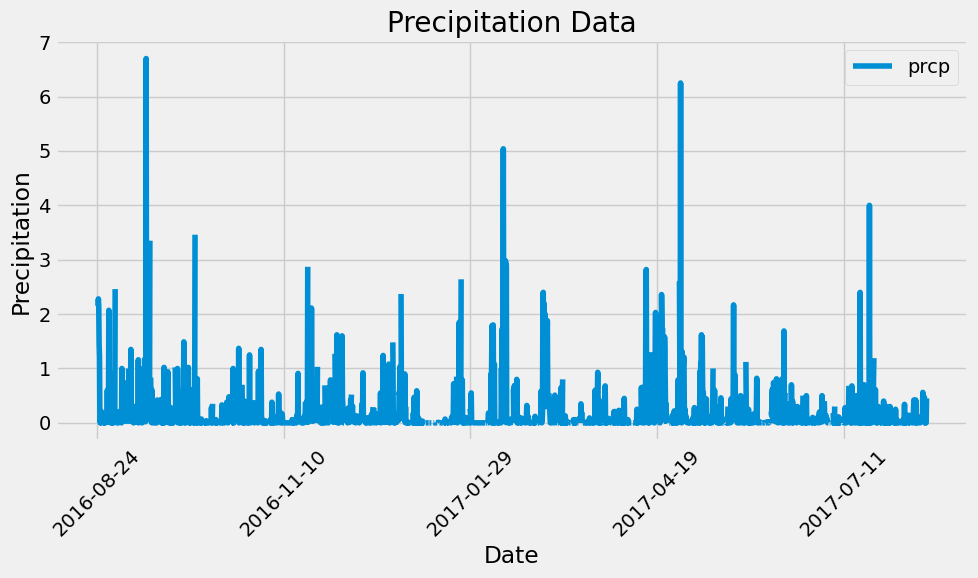

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

most_recent_date = '2017-08-23'
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
previous_year = most_recent_date - timedelta(days=365)
#print(previous_year)

# Perform a query to retrieve the data and precipitation scores
rain = select([measurement.date, measurement.prcp]).where(measurement.date > previous_year)

# Execute the select query
result = engine.execute(rain)

# Fetch the result
most_recent = result.fetchall()

#print(most_recent)  #<<<<remove hashtag in front of print to check results. 

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame()

# Iterate through each row of the fetched result
for row in most_recent:
    # Convert the row to a DataFrame and append to the main DataFrame
    df = pd.concat([df, pd.DataFrame([row], columns=result.keys())])

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Print the DataFrame
#print(df) #<< remove the # in front of the print to see the sorted df

# Sort the dataframe by date
df_sorted = df.sort_values('date')

# Print the sorted DataFrame
#print(df_sorted) #<< remove # in front of print to print sorted df


# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='date', y='prcp', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df['prcp'].describe())

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.name).count()
# for s in stations:
#     print(s)
print(f"There are {stations} staions in the data set")

There are 9 in the data set


In [45]:
# tables = inspector.get_table_names()
# for t in tables:
#     cols = inspector.get_columns(t)
#     print(t)
#     for c in columns:
#         print(c)

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrem

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f"Station: {station}, Rows: {count}")

Station: USC00519281, Rows: 2772
Station: USC00519397, Rows: 2724
Station: USC00513117, Rows: 2709
Station: USC00519523, Rows: 2669
Station: USC00516128, Rows: 2612
Station: USC00514830, Rows: 2202
Station: USC00511918, Rows: 1979
Station: USC00517948, Rows: 1372
Station: USC00518838, Rows: 511


In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(
    func.min(measurement.tobs).label('lowest_temp'),
    func.max(measurement.tobs).label('highest_temp'),
    func.avg(measurement.tobs).label('average_temp')
).filter(measurement.station == 'USC00519281').first()

# Extract the results
lowest_temp = result.lowest_temp
highest_temp = result.highest_temp
average_temp = result.average_temp

# Print the results
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


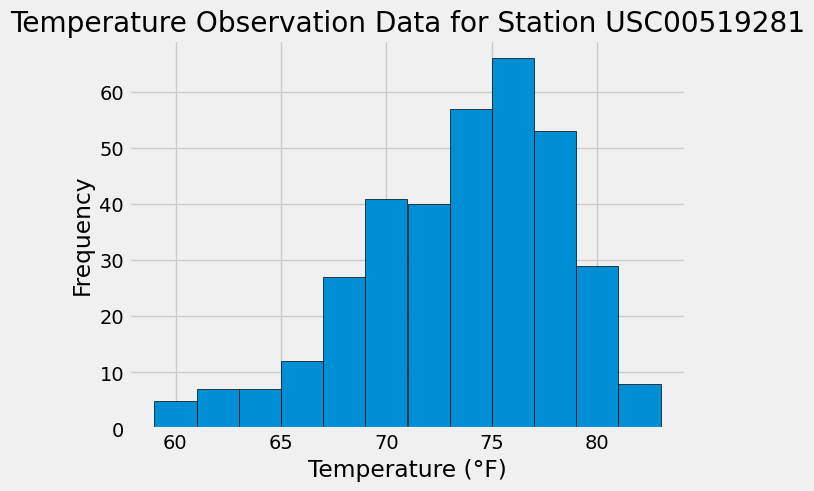

In [68]:
# Using the most active station id USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(measurement.tobs).filter(
    measurement.station == 'USC00519281',
    measurement.date >= func.date(func.strftime('%Y-%m-%d', most_recent_date), '-12 months')
).order_by(desc(measurement.date)).all()

# Extract the temperature data from the query result - hiting list ie [0]
temperatures = [result[0] for result in query]

# Plot the histogram
plt.hist(temperatures, bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data for Station USC00519281')
plt.show()



# Close Session

In [70]:
# Close Session
session.close()